In [1]:
import pandas as pd
import numpy as np
import PIL
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from PIL import Image

In [2]:
chair_df = pd.read_csv('0306_chair_label_a.csv.csv')
chair_df

seat_height  seat_depth  seat_width  seat_radius  number_legs  \
0            484         364         349           45            2   
1            434         369         385            7            3   
2            426         401         373          133            2   
3            467         367         384           63            3   
4            464         396         343           35            2   
..           ...         ...         ...          ...          ...   
995          432         361         324          138            2   
996          457         379         397           60            2   
997          429         373         343            7            3   
998          430         419         345          147            2   
999          467         418         351            7            3   

     leg_offset  seat_back_H  number_spindle  
0           1.8            2               1  
1           1.0            2               1  
2           1.8            1               4  
3           1.8            2               4  
4           1.8            1               3  
..          ...          ...             ...  
995         1.0            1               3  
996         1.8            1               2  
997         1.0            1               4  
998         1.0            2               4  
999         1.8            1               5  

[1000 rows x 8 columns]

In [3]:
np.unique(chair_df.iloc[:, 4:].values, axis=0)

array([[1. , 1. , 0. , 2. ],
       [1. , 1. , 0. , 4. ],
       [1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 2. ],
       [1. , 1. , 1. , 3. ],
       [1. , 1. , 1. , 4. ],
       [1. , 1. , 1. , 5. ],
       [1. , 1. , 2. , 1. ],
       [1. , 1. , 2. , 2. ],
       [1. , 1. , 2. , 3. ],
       [1. , 1. , 2. , 4. ],
       [1. , 1. , 2. , 5. ],
       [1. , 1. , 3. , 2. ],
       [1. , 1. , 3. , 3. ],
       [1. , 1.8, 0. , 1. ],
       [1. , 1.8, 0. , 2. ],
       [1. , 1.8, 0. , 3. ],
       [1. , 1.8, 0. , 4. ],
       [1. , 1.8, 0. , 5. ],
       [1. , 1.8, 1. , 1. ],
       [1. , 1.8, 1. , 2. ],
       [1. , 1.8, 1. , 3. ],
       [1. , 1.8, 1. , 4. ],
       [1. , 1.8, 1. , 5. ],
       [1. , 1.8, 2. , 1. ],
       [1. , 1.8, 2. , 2. ],
       [1. , 1.8, 2. , 3. ],
       [1. , 1.8, 2. , 4. ],
       [1. , 1.8, 2. , 5. ],
       [1. , 1.8, 3. , 2. ],
       [1. , 1.8, 3. , 3. ],
       [1. , 1.8, 3. , 4. ],
       [1. , 1.8, 3. , 5. ],
       [2. , 1. , 0. , 1. ],
       [2. , 1

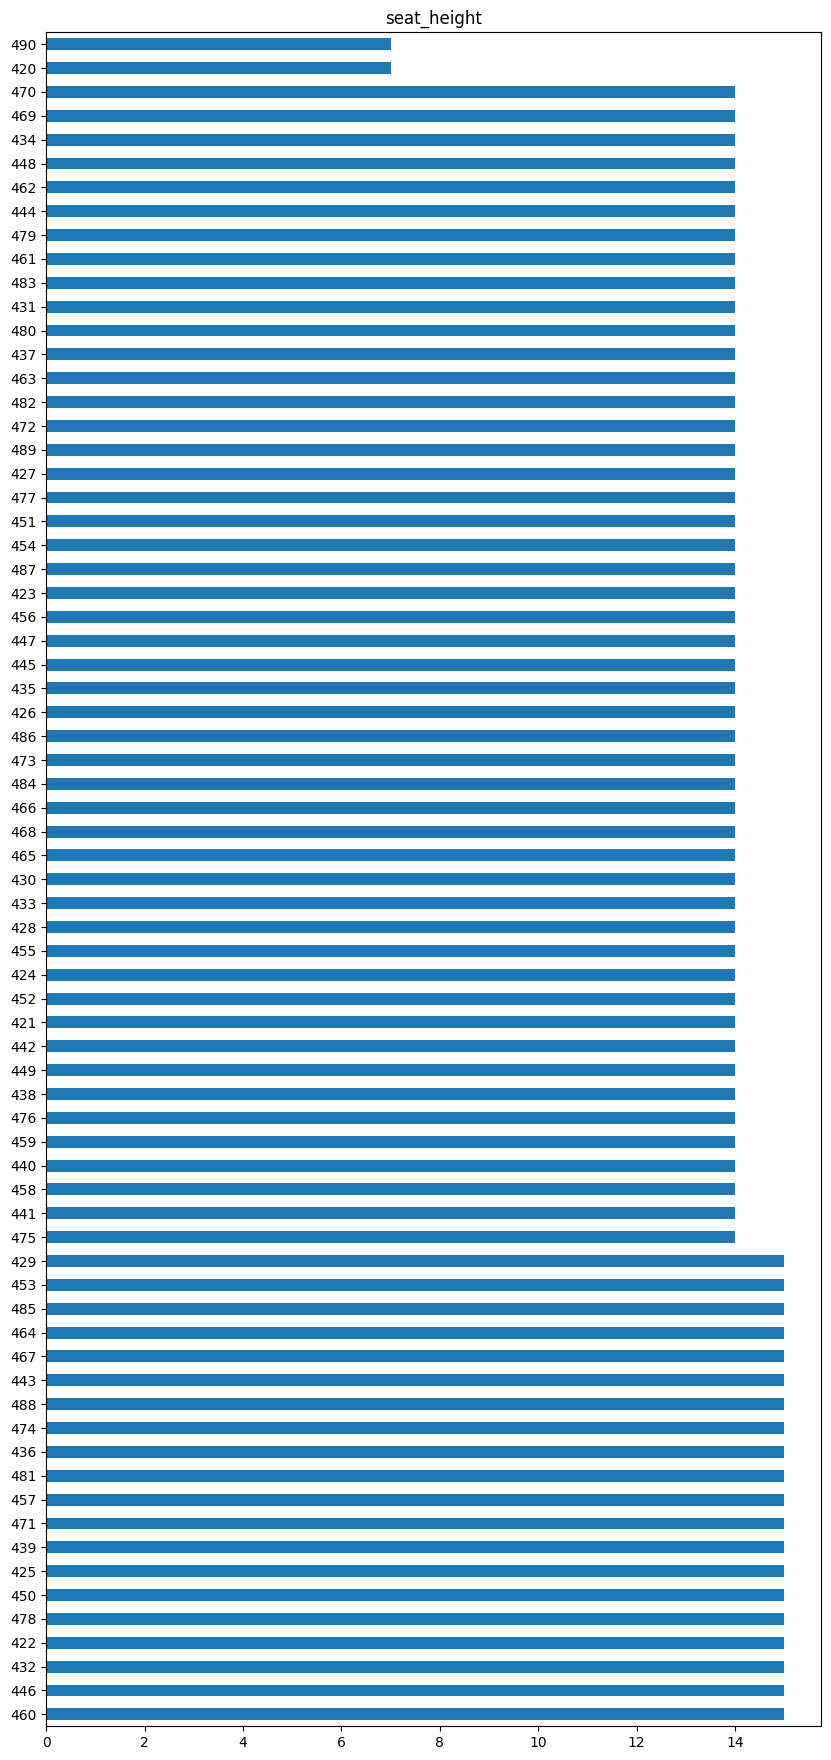

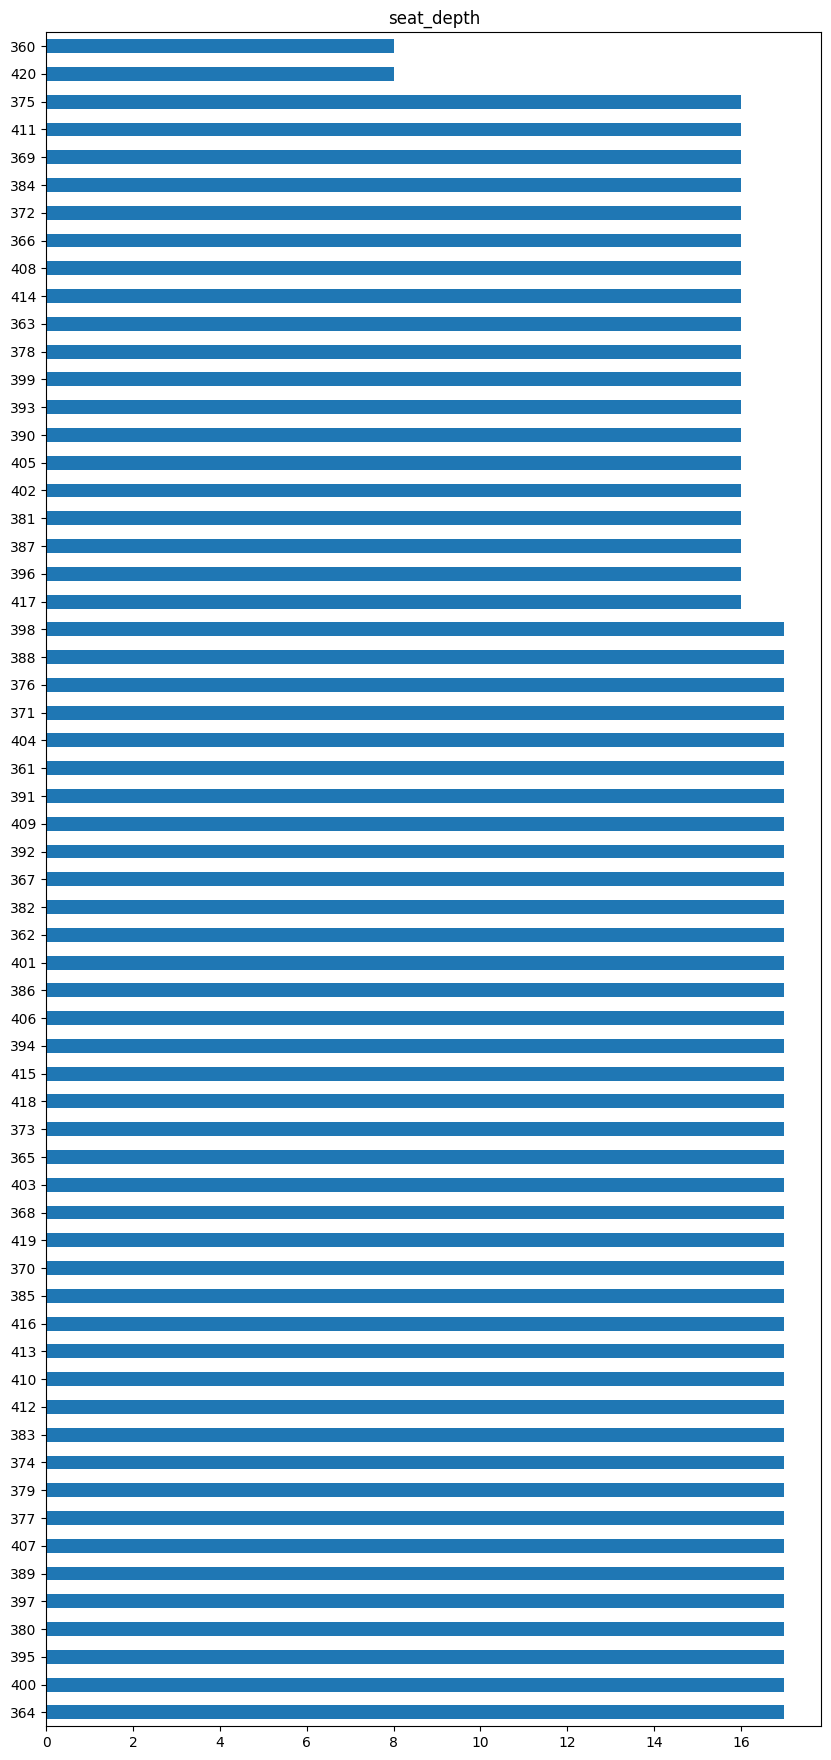

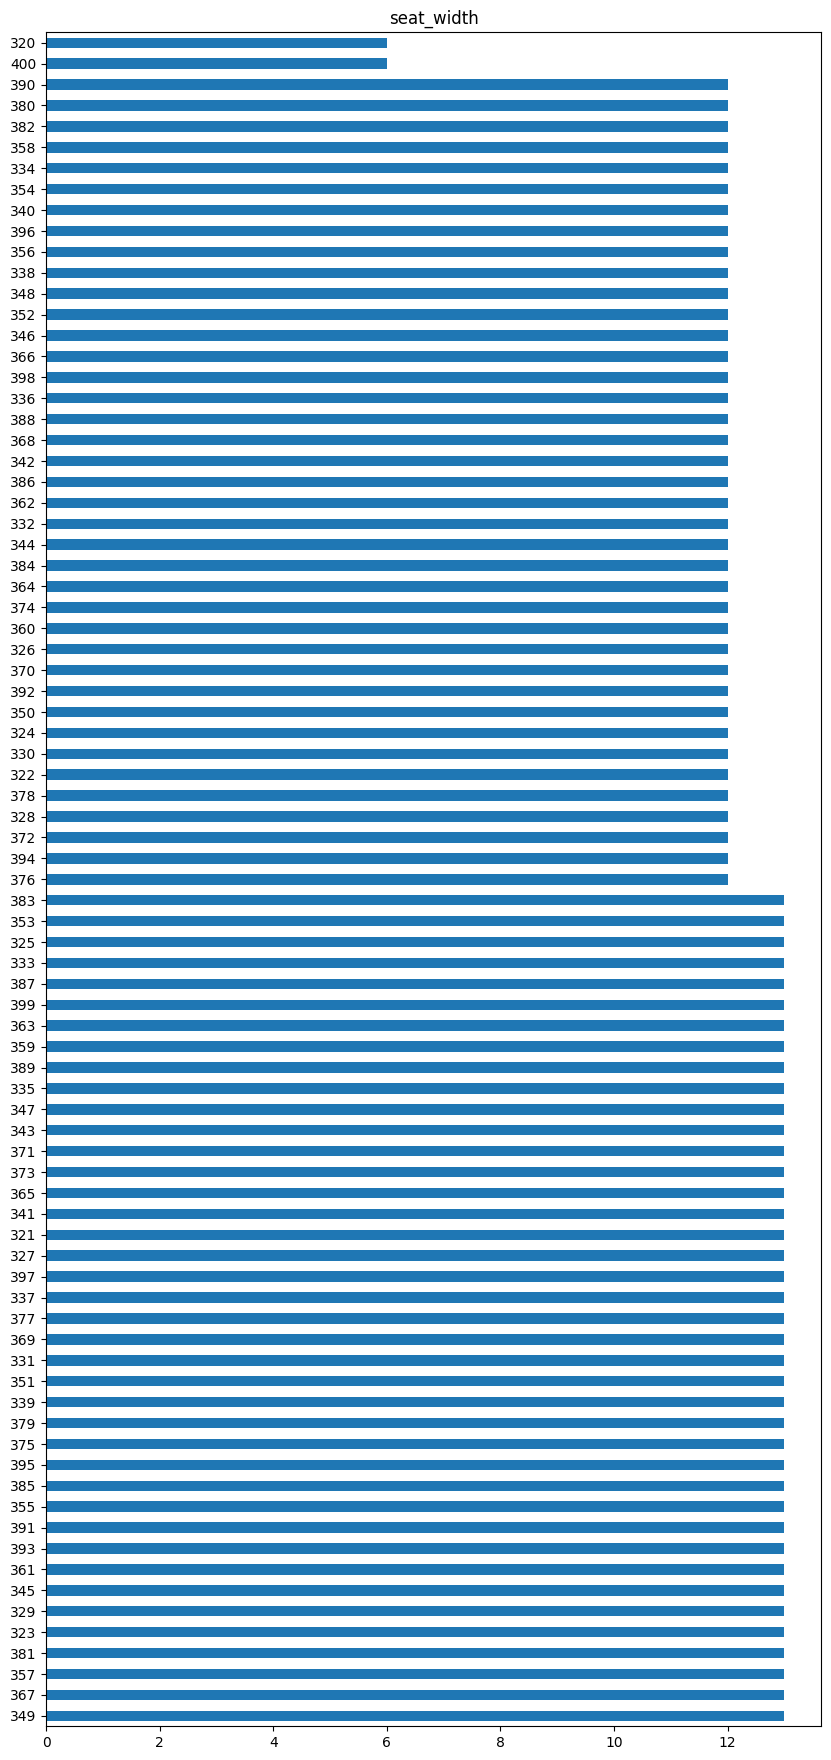

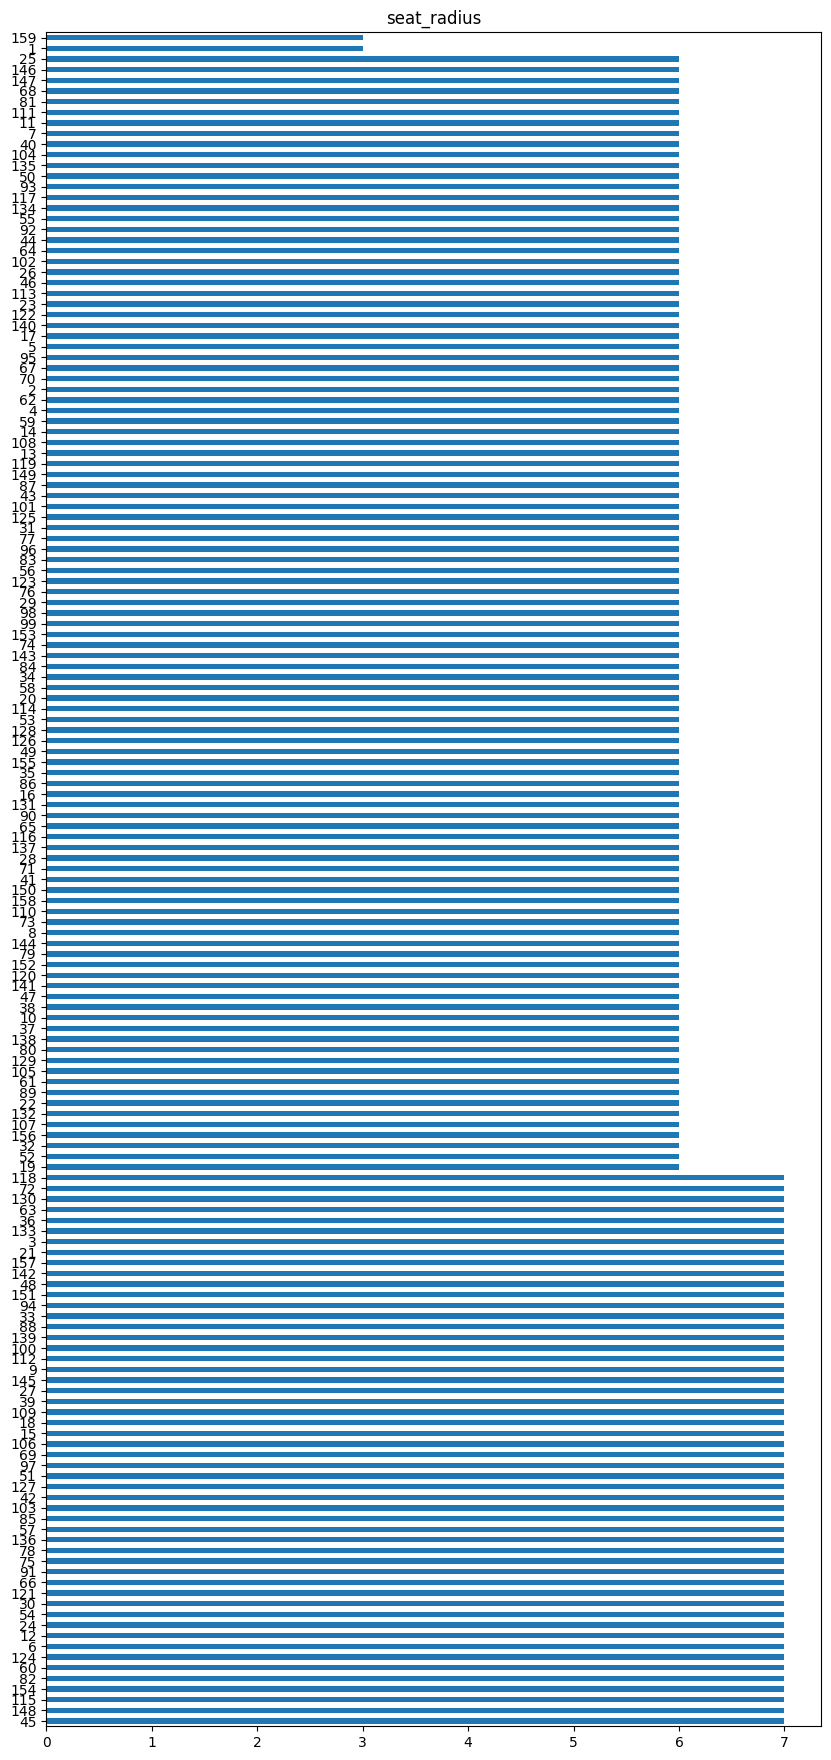

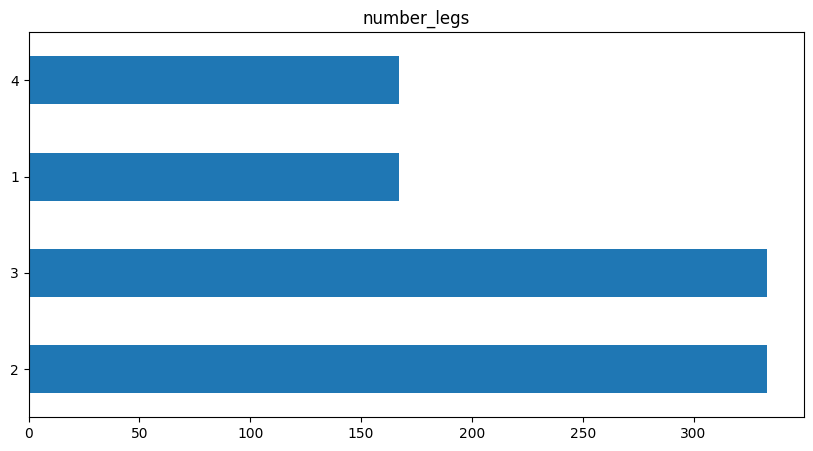

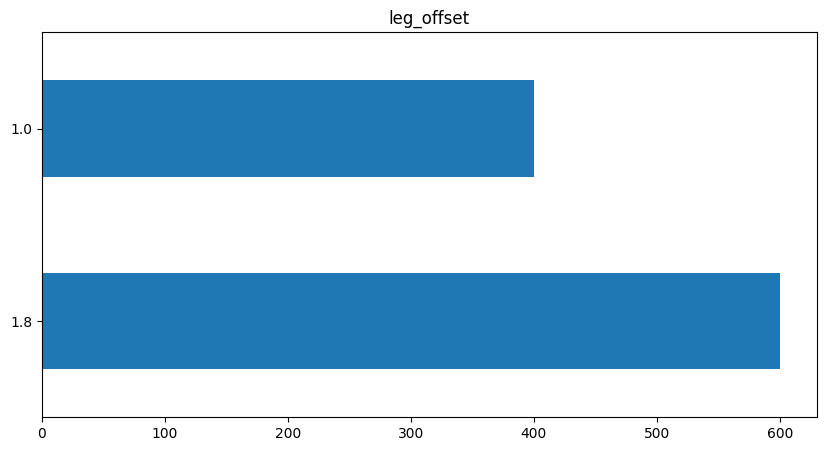

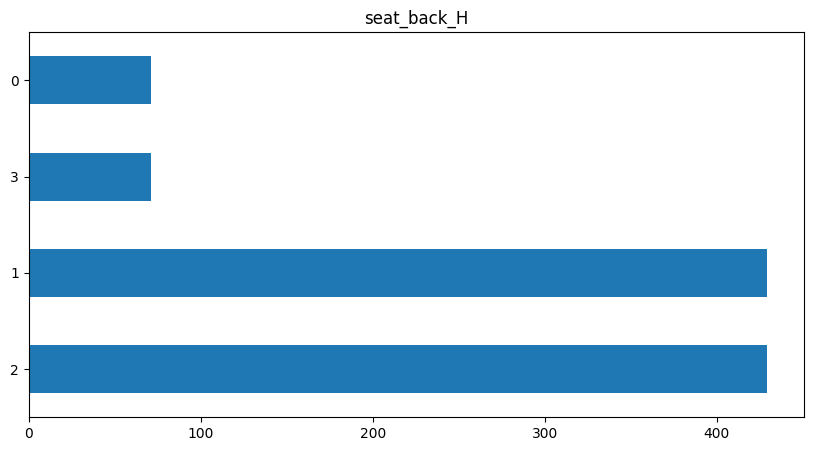

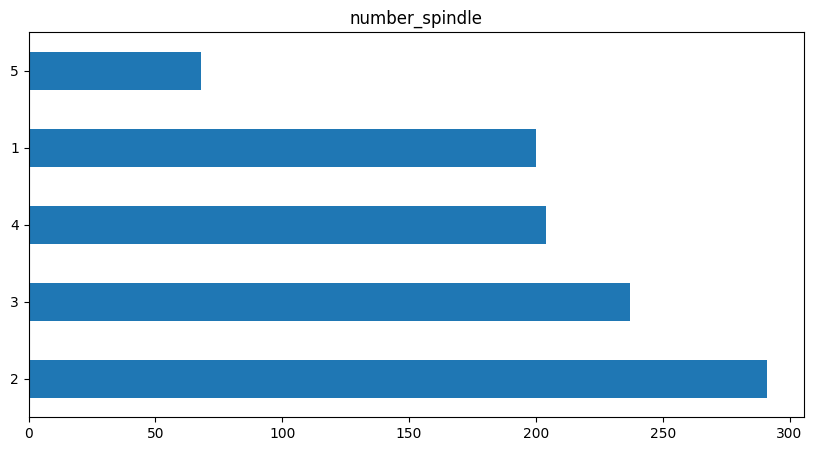

In [4]:
for i, c in enumerate(chair_df.columns):
    figsize = (10,22) if i<=3 else (10,5)
    plt.figure(figsize=figsize)
    chair_df[c].value_counts().plot(kind='barh')
    plt.title(c)
    

# Image Read & Image to array for Training

In [5]:
data = []
labels = []

target_cols = ['number_legs', 'leg_offset', 'seat_back_H', 'number_spindle']

target = target_cols[0]

targets = chair_df[target].unique()

height = 32
width = 32
channels = 1

img_path = 'img_temp5'
label_dict = {}
for i, img in enumerate(os.listdir(img_path)):
    label = chair_df.loc[i, target]
    label_dict[img] = label
    dir = os.path.join(img_path, img)
    image = cv2.imread(dir,cv2.IMREAD_GRAYSCALE)
    image_from_array = Image.fromarray(image, 'L')

    resized_image = image_from_array.resize((height, width))
    data.append(np.array(resized_image))
    labels.append(label)


data = np.array(data)
labels = np.array(labels)

In [6]:
sorted_label = sorted(label_dict.items(), key=lambda x: x[1])

## Label Cartography

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  del sys.path[0]


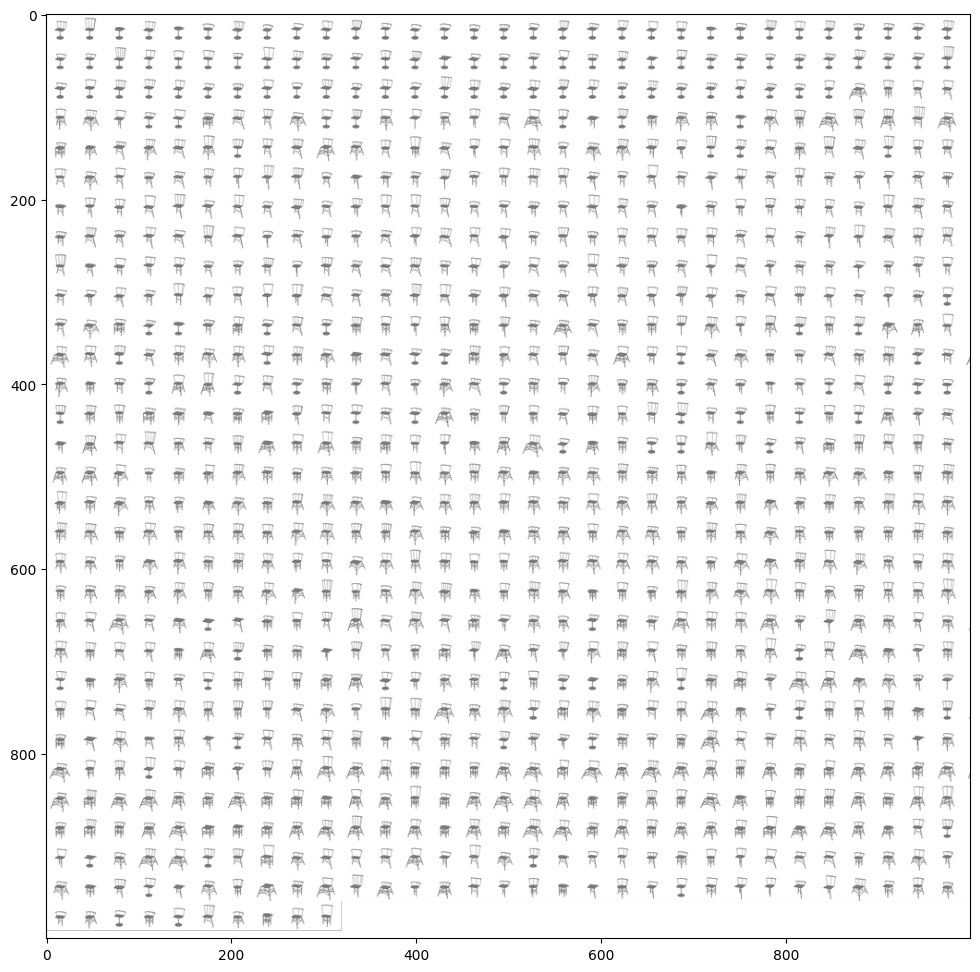

In [7]:
fwidth = 1000
fheight = 1000
max_dim = 100

full_image = Image.new('RGBA', (fwidth, fheight))
x, y = 0, 0
for idx, (img,label) in enumerate(sorted_label):
    # print(img, label)
    dir = os.path.join(img_path, img)
    tile = Image.open(dir)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    # tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    tile = tile.resize((width, height), Image.ANTIALIAS)

    full_image.paste(tile,(x, y), mask=tile.convert('RGBA'))
    if x >= fwidth:
        y += tile.height
        x = 0
    else:
        x += tile.width
    
plt.figure(figsize = (16,12))
plt.imshow(full_image)

# Color Dist

(257,)


<BarContainer object of 256 artists>

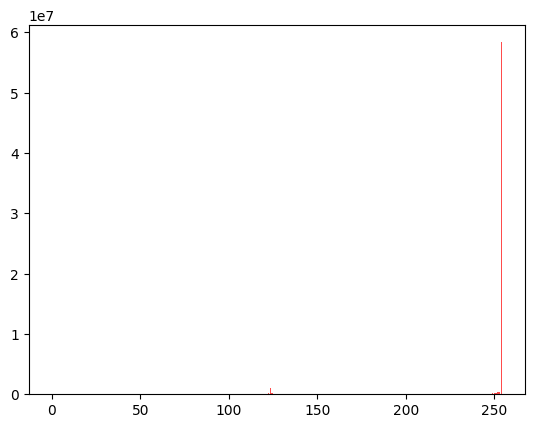

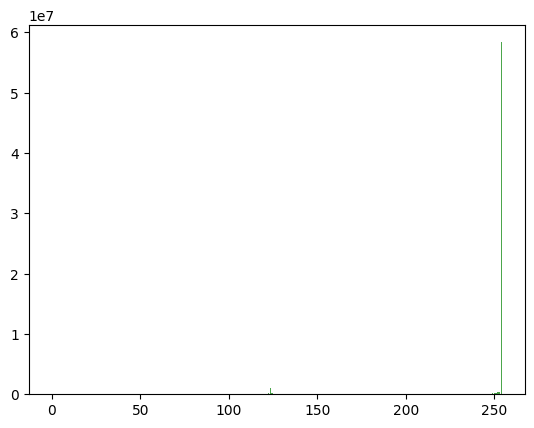

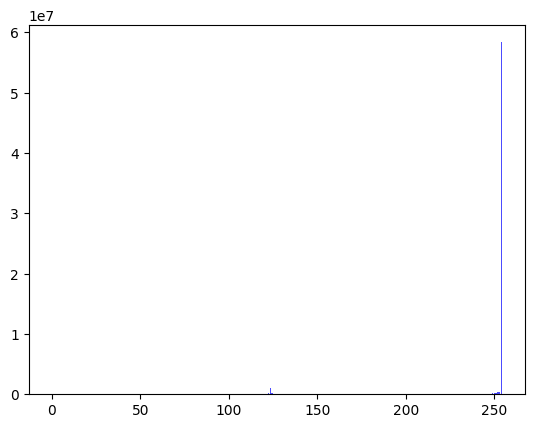

In [32]:
nb_bins = 256
count_r = np.zeros(nb_bins)
count_g = np.zeros(nb_bins)
count_b = np.zeros(nb_bins)

for idx, (img,label) in enumerate(sorted_label):
  
  dir = os.path.join(img_path, img)
  img = Image.open(dir)
  x = np.array(img)
  x = x.transpose(2, 0, 1)

  hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
  hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
  hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
  count_r += hist_r[0]
  count_g += hist_g[0]
  count_b += hist_b[0]


bins = hist_r[1]
print(bins.shape)
fig = plt.figure()
plt.bar(bins[:-1], count_r, color='r', alpha=0.7)
fig = plt.figure()
plt.bar(bins[:-1], count_g, color='g', alpha=0.7)
fig = plt.figure()
plt.bar(bins[:-1], count_b, color='b', alpha=0.7)

# TSNE-PCA-UMAP

In [9]:
x = data.astype('float32')
y = labels

ReX_train = x.reshape(x.shape[0], -1)

In [10]:
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def run_tsne(x_in,label):
    X_embedded = TSNE(n_components=2, random_state=20) # 주성분을 몇개로 할지 결정
    tsne_ = X_embedded.fit_transform(x_in)
    tsneDF = pd.DataFrame(data=tsne_, columns = ['tsne_component1', 'tsne_component2'])
    fig = plt.figure(figsize = (15, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel('tsne Component 1', fontsize = 15)
    ax.set_ylabel('tsne Component 2', fontsize = 15)
    ax.set_title('2 component tsne', fontsize=20)
    
    y = pd.DataFrame(label, columns=['label'])
    targets = np.unique(label)
    cmap = get_cmap(len(targets))
    finalDf = pd.concat([tsneDF,y], axis = 1)

    for i, target in enumerate(targets):
        indicesToKeep = finalDf['label'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'tsne_component1'], finalDf.loc[indicesToKeep, 'tsne_component2'], c=cmap(i), s = 60)
    ax.legend(targets, bbox_to_anchor=(1.04, 1), ncol=2)
    ax.grid()

    return finalDf



def run_pca(x_in,label):
    X_PCA = PCA(n_components=2, random_state=20) # 주성분을 몇개로 할지 결정
    X_PCA.fit(x_in)
    
    pca_org = X_PCA.transform(x_in)

    pca_orgDF = pd.DataFrame(data=pca_org, columns = ['pca_component1', 'pca_component2'])

    fig = plt.figure(figsize = (15, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel('pca Component 1', fontsize = 15)
    ax.set_ylabel('pca Component 2', fontsize = 15)
    ax.set_title('2 component pca', fontsize=20)
    
    y = pd.DataFrame(label, columns=['label'])

    targets = np.unique(label)
    cmap = get_cmap(len(targets))
    finalDf = pd.concat([pca_orgDF,y], axis = 1)
    for i, target in enumerate(targets):
        indicesToKeep = finalDf['label'] == target 
        ax.scatter(finalDf.loc[indicesToKeep, 'pca_component1'], finalDf.loc[indicesToKeep, 'pca_component2'], c=cmap(i), s = 60)
    ax.legend(targets, bbox_to_anchor=(1.04, 1), ncol=2)
    ax.grid()

    return finalDf


def run_umap(x_in,label):
    X_UMAP = umap.UMAP(n_components=2, random_state=20) # 주성분을 몇개로 할지 결정
    X_UMAP.fit(x_in)
    
    embedding = X_UMAP.transform(x_in)

    umapdf = pd.DataFrame(data=embedding, columns = ['umap_component1', 'umap_component2'])

    fig = plt.figure(figsize = (15, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel('umap Component 1', fontsize = 15)
    ax.set_ylabel('umap Component 2', fontsize = 15)
    ax.set_title('2 component umap', fontsize=20)
    
    y = pd.DataFrame(label, columns=['label'])

    targets = np.unique(label)
    cmap = get_cmap(len(targets))
    finalDf = pd.concat([umapdf,y], axis = 1)
    for i, target in enumerate(targets):
        indicesToKeep = finalDf['label'] == target 
        ax.scatter(finalDf.loc[indicesToKeep, 'umap_component1'], finalDf.loc[indicesToKeep, 'umap_component2'], c=cmap(i), s = 60)
    ax.legend(targets, bbox_to_anchor=(1.04, 1), ncol=2)
    ax.grid()

    return finalDf


d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you inte

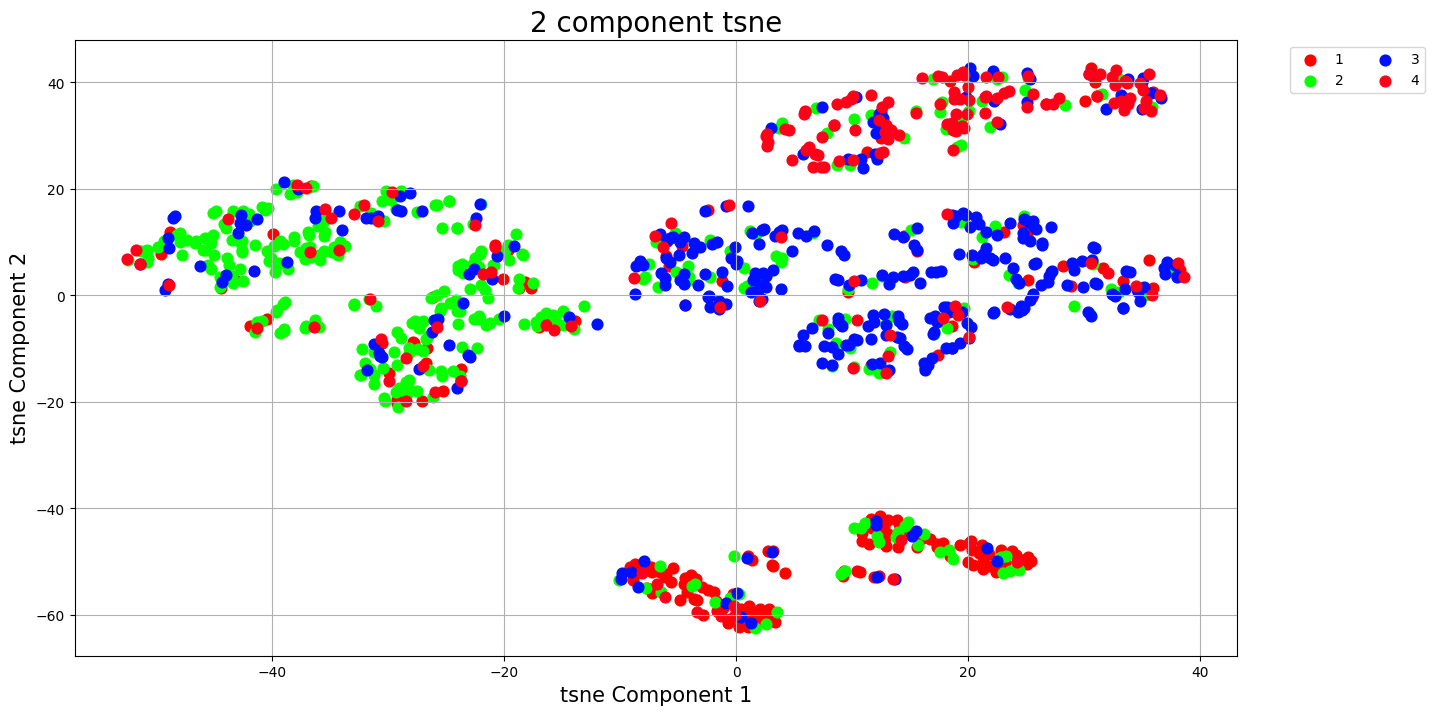

In [11]:

tsne_result = run_tsne(ReX_train, y)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

pca_component1  pca_component2  label
0        -14.680237     -329.608826      2
1       -141.355942      191.451416      3
2       -120.280655      250.854523      2
3        -56.581108     -163.595078      3
4       -107.299431     -115.563751      2
..              ...             ...    ...
995      -97.055801      173.779800      2
996      -38.695999      188.324982      2
997       80.514175        6.758183      3
998     -147.390640      251.910660      2
999      -69.765686      186.217468      3

[1000 rows x 3 columns]

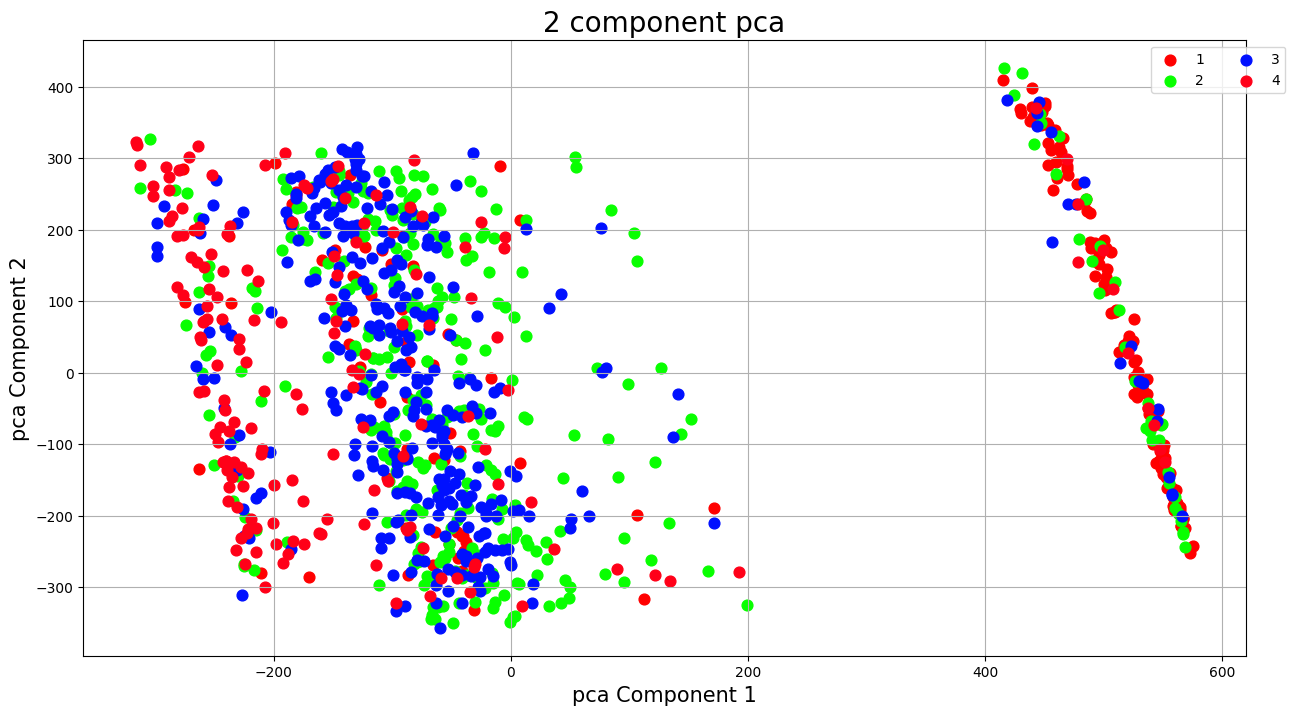

In [12]:

run_pca(ReX_train, y)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

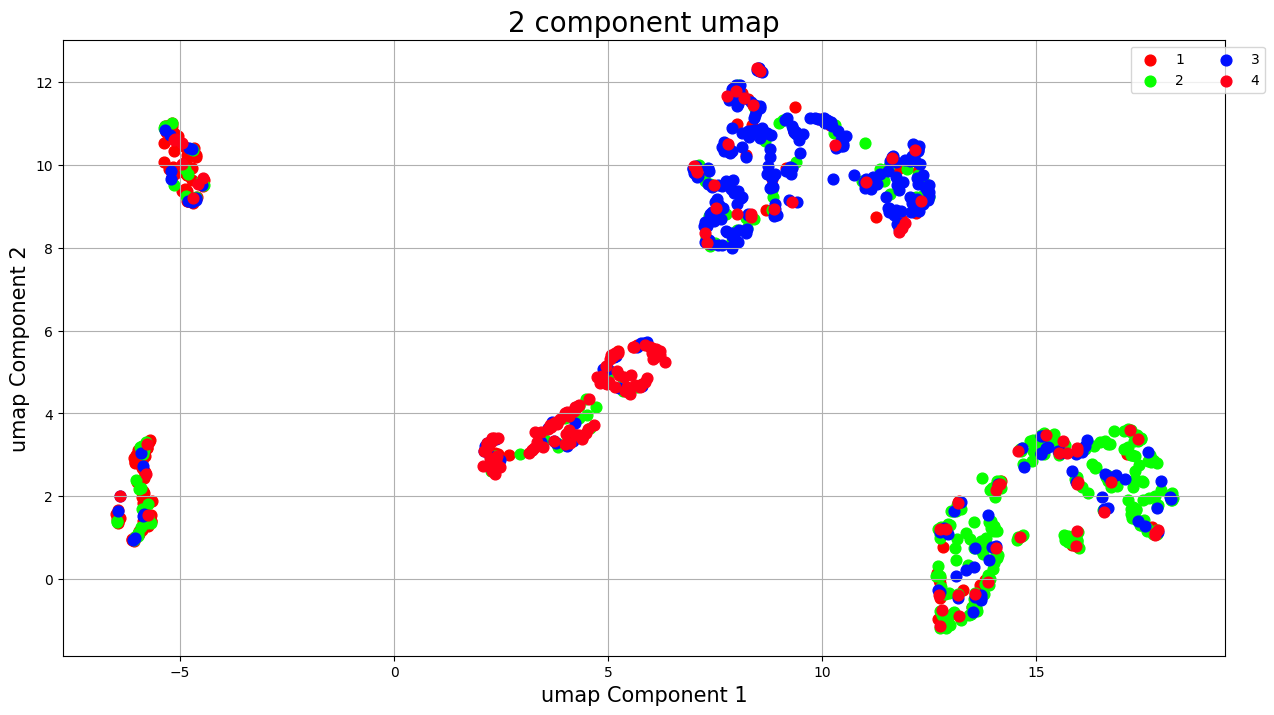

In [13]:
umap = run_umap(ReX_train, y)

# hue, saturation

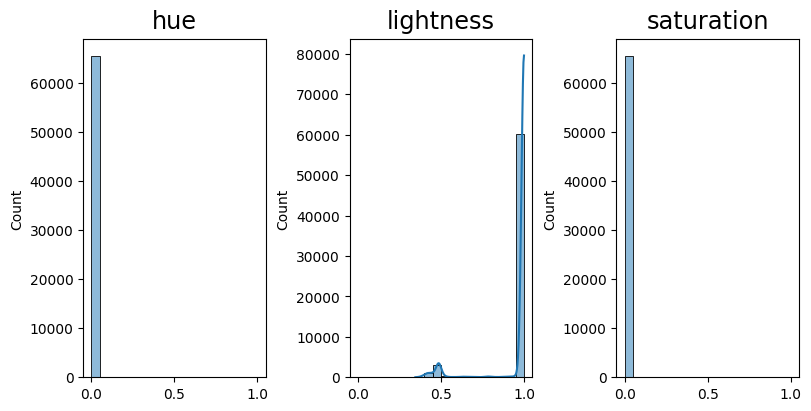

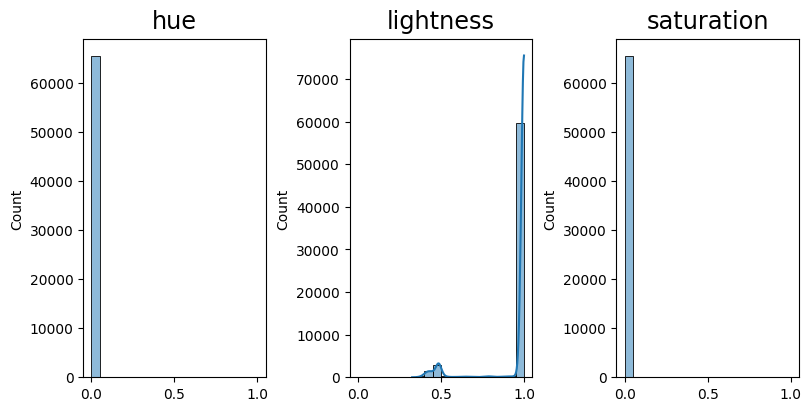

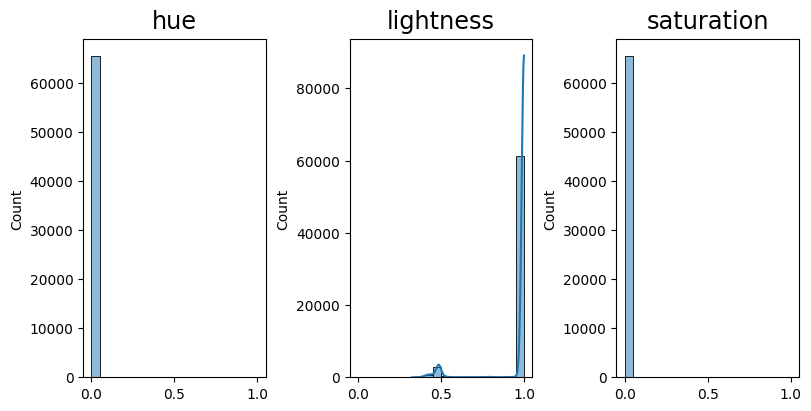

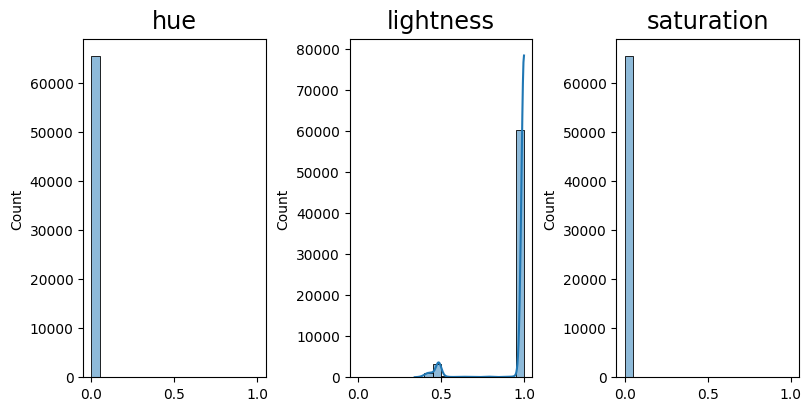

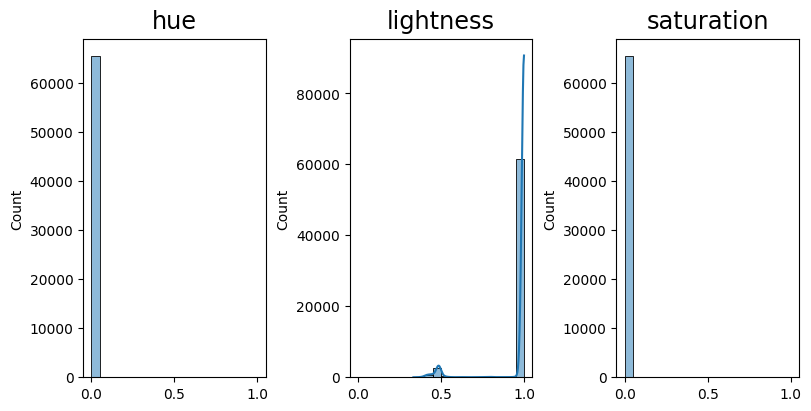

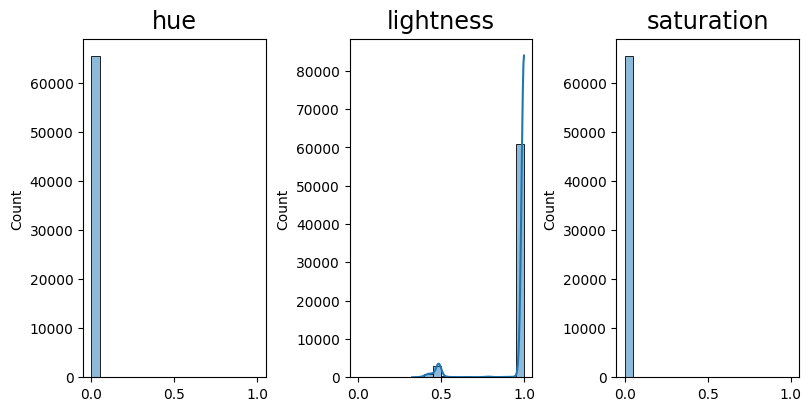

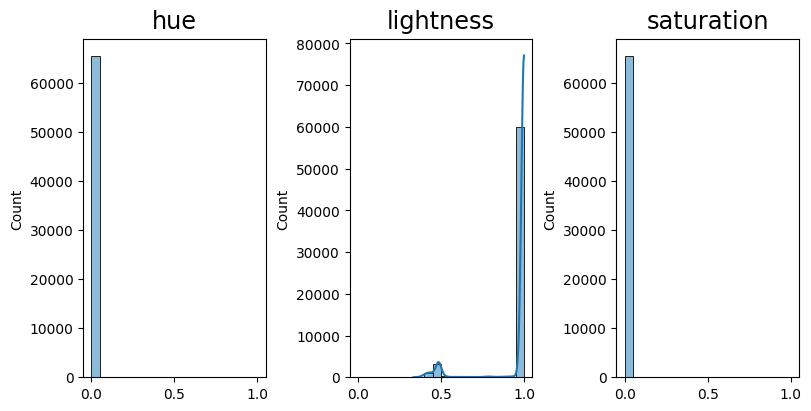

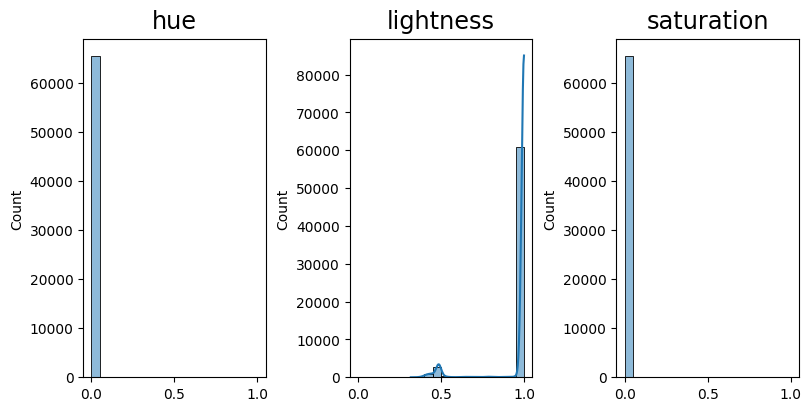

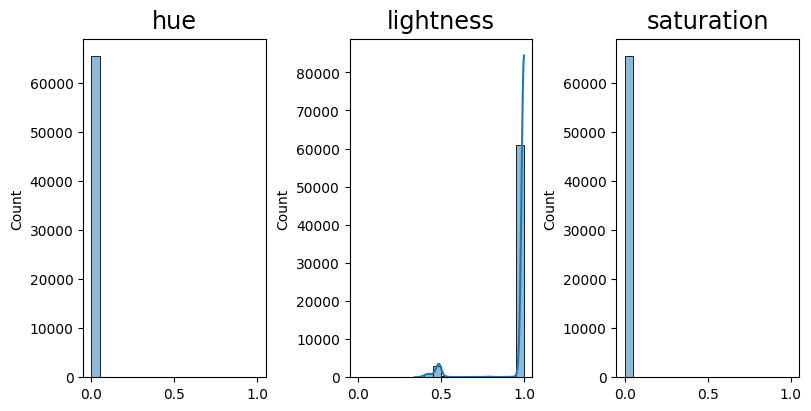

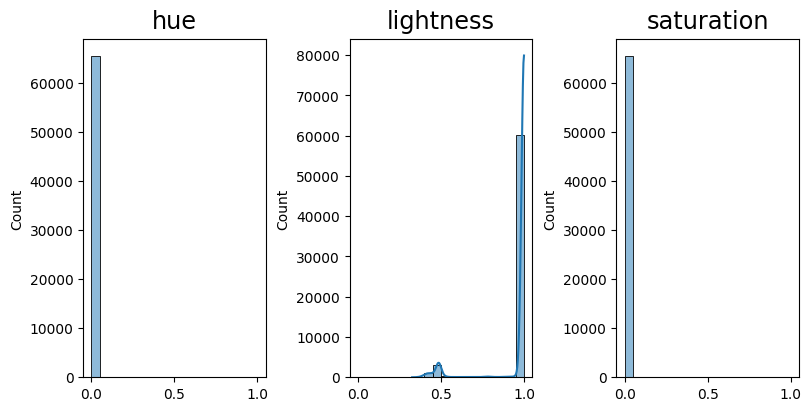

KeyboardInterrupt: 

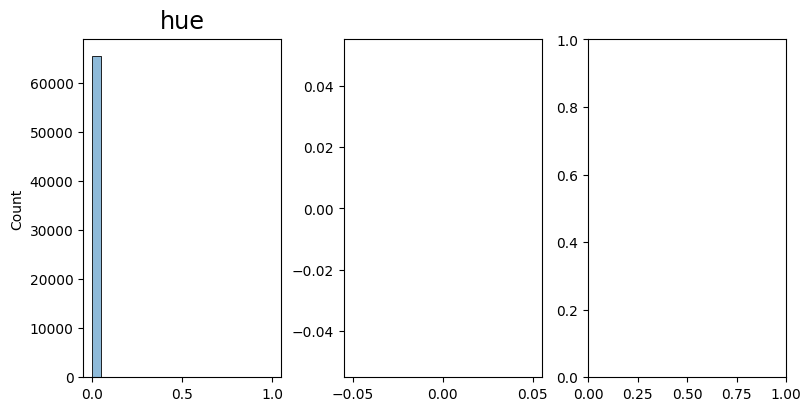

In [39]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorsys
import seaborn as sns
nb_bins = 256
count_h = np.zeros(20)
count_l = np.zeros(20)
count_s = np.zeros(20)


for idx, (img,label) in enumerate(sorted_label):
  
  dir = os.path.join(img_path, img)
  img = Image.open(dir)
  x = np.array(img)
  img_hls = np.array([colorsys.rgb_to_hls(*c) for c in (x/255).reshape((x.shape[0]*x.shape[1], 3))]).T
  fig, axs = plt.subplots(ncols=3, figsize=(8, 4), constrained_layout=True)
  for i, (title, ax) in enumerate(zip(["hue", "lightness", "saturation"], axs)):
      sns.histplot(img_hls[i], kde=True, bins=np.linspace(0, 1, 21), ax=ax)
      ax.set_title(title, fontsize="xx-large", pad=8)

  plt.show()
#   hist_h = np.histogram(img_hls[0], bins=np.linspace(0, 1, 21))
#   count_h += hist_h[0]


# bins = hist_h[1]
# print(bins.shape)
# fig = plt.figure()
# plt.bar(bins[:-1], count_h, color='r', alpha=0.7)

